# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle that contains information on 3 million used cars.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding


From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Business Objective: The primary objective of the business is to find out what consumers value in a used car.

Related business questions:
1. What and how much features of a used car contribute to the price of the car?<br>
2. What are the features of a car that consumers value to purchase that car? <br>
The assumption is that the cars that are bought in higher numbers has the features that customers like while comparing the same make and model of the car.

Data mining goal: Predict the sale of a  certain used car in the dealership.

Data mining success criteria: Predict the sale of a certain used car accurately 80% of the time.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Initial Data: A kaggle dataset with 426,880 not null rows will be used for this analysis. The data has been downloaded from Kaggle. 

Data Description: The data has NaN values that needs to be addressed either with a default or if a default cannot be assigned then by removing the row with NaN value. There are 18 columns with 3 of the relevant columns being a number. The other 14 object type columns. Size information is missing for about two-thirds of vehicles in this dataset.The VIN is another identification number besides the id.

In [3]:
car_data = pd.read_csv('data/vehicles.csv')

In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

Text(0.5, 1.0, 'Number of rows for each Cylinder type')

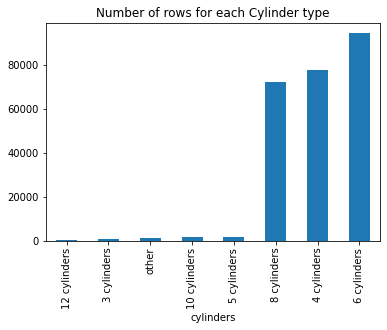

In [5]:
cyl = car_data.groupby('cylinders')['price'].count().sort_values()
cyl.plot.bar()
plt.xticks(rotation='vertical')
plt.title("Number of rows for each Cylinder type")

Text(0.5, 1.0, 'Number of rows for each paint color')

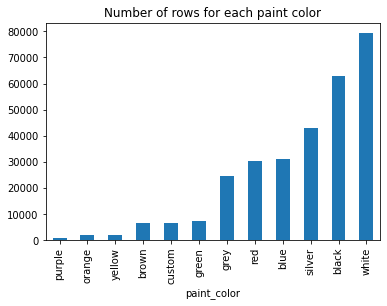

In [6]:
paint = car_data.groupby('paint_color')['price'].count().sort_values()
paint.plot.bar()
plt.xticks(rotation='vertical')
plt.title("Number of rows for each paint color")

Text(0.5, 1.0, 'Number of rows for each Condition type')

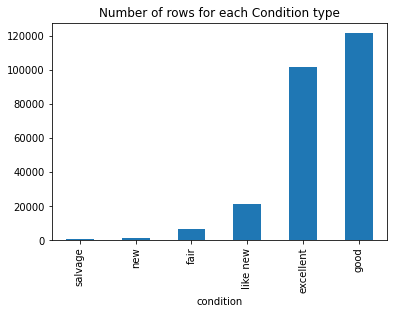

In [7]:
cond = car_data.groupby('condition')['price'].count().sort_values()
cond.plot.bar()
plt.xticks(rotation='vertical')
plt.title("Number of rows for each Condition type")

Text(0.5, 1.0, 'Number of rows for each Fuel type')

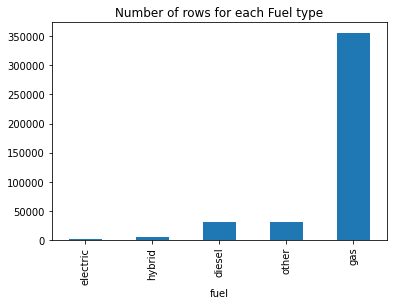

In [8]:
fuel = car_data.groupby('fuel')['price'].count().sort_values()
fuel.plot.bar()
plt.xticks(rotation='vertical')
plt.title("Number of rows for each Fuel type")

Text(0.5, 1.0, 'Number of rows for each Title Status type')

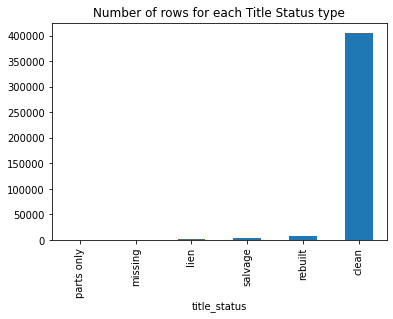

In [9]:
titlest = car_data.groupby('title_status')['price'].count().sort_values()
titlest.plot.bar()
plt.xticks(rotation='vertical')
plt.title("Number of rows for each Title Status type")

Text(0.5, 1.0, 'Number of rows for each Transmission type')

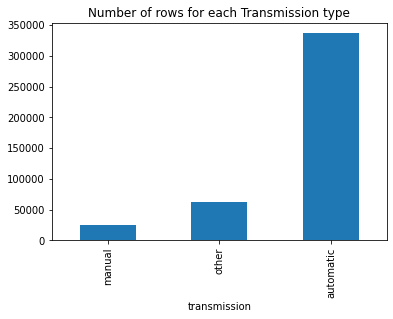

In [10]:
trans = car_data.groupby('transmission')['price'].count().sort_values()
trans.plot.bar()
plt.xticks(rotation='vertical')
plt.title("Number of rows for each Transmission type")

Text(0.5, 1.0, 'Number of rows for each Drive type')

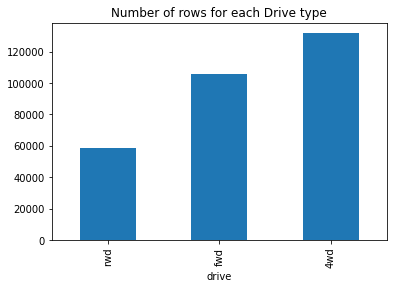

In [11]:
drive = car_data.groupby('drive')['price'].count().sort_values()
drive.plot.bar()
plt.xticks(rotation='vertical')
plt.title("Number of rows for each Drive type")

In [12]:
car_data.groupby(['model'])['price'].count().sort_values(ascending=False)

model
f-150                          8009
silverado 1500                 5140
1500                           4211
camry                          3135
silverado                      3023
                               ... 
crosstrek 2.0i premium aw         1
crosstrek 2.0i prem               1
crosstrek 2.0i limited cvt        1
crosstrek 2.0i limited aw         1
🔥GMC Sierra 1500 SLE🔥 4X4 🔥       1
Name: price, Length: 29649, dtype: int64

In [13]:
car_data.groupby(['year'])['price'].count().sort_values(ascending=False).loc[2000:2022]

year
2000.0    3572
1999.0    3094
2021.0    2396
1998.0    1988
1997.0    1724
1996.0    1302
1995.0    1246
1994.0     968
1993.0     712
1992.0     626
1991.0     608
1990.0     599
1989.0     571
1987.0     532
1988.0     528
1986.0     523
1985.0     469
1968.0     425
1966.0     424
1969.0     409
1972.0     409
1984.0     387
1979.0     387
1965.0     365
1967.0     357
1970.0     345
1978.0     345
1973.0     334
1971.0     312
1974.0     280
1977.0     273
1980.0     272
1964.0     270
1983.0     257
1976.0     242
1963.0     234
1955.0     226
1982.0     217
1981.0     214
1975.0     204
1957.0     174
1956.0     160
1962.0     138
2022.0     133
Name: price, dtype: int64

In [14]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [15]:
car_data[['price']].describe()


,price
count,426880.000
mean,75199.033
std,12182282.174
min,0.000
25%,5900.000
50%,13950.000
75%,26485.750
max,3736928711.000


Data Exploration:
Cylinder type: It makes sense to just keep the most common ones - 4, 6 amd 8 cylinder types. All other data types can be removed.
Paint color - Keep all data and process using one hot encoding
Condition - All data categories will be processed using ordinal encoding with 6-1 new, like new, excellent, good, fair and salvage in that order.
Fuel - Include all data categories with one hot encoding.
Title Status - Remove missing and parts only rows. Other rows subject ordinal encoding with clean at 1 and lien at 4
Transmission - Include all categories with one hot encoding.
Drive - Include all categories with one hot encoding.
Model - There are 29,649 models and the data is not all about model name. Need a process to clean this up. May be remove values with count 1. 1500, 2500 and 3500 entries merge with respective Silverado models.
Year - Possibly remove counts of 1.

Data Quality: There are a lot of data that are missing. Some data such as models have quality issues where a same product is described differently. For instance models for Silverado 1500 is described as 1500 and Silverado 1500. The data should be merged to get a better picture of the data.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [16]:
#Remove columns that are not needed or have not enough data
car_data = car_data.drop(['id', 'region', 'VIN', 'state', 'size'], axis=1)

In [17]:
#Fill "good" value where there is no value
car_data['condition'] = car_data['condition'].fillna('good')

In [18]:
#Remove rows that are na
car_data = car_data.dropna()

In [19]:
car_data.drop(car_data.groupby('model').filter(lambda x: x.price.count()<=100).index).groupby('model')['price'].count().sort_values()

model
econoline                        101
fusion sel                       102
benz e350                        102
sonata gls                       103
econoline commercial cutaway     104
                                ... 
accord                          1333
camry                           1386
1500                            1520
silverado 1500                  2528
f-150                           3112
Name: price, Length: 260, dtype: int64

In [20]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156527 entries, 31 to 426878
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         156527 non-null  int64  
 1   year          156527 non-null  float64
 2   manufacturer  156527 non-null  object 
 3   model         156527 non-null  object 
 4   condition     156527 non-null  object 
 5   cylinders     156527 non-null  object 
 6   fuel          156527 non-null  object 
 7   odometer      156527 non-null  float64
 8   title_status  156527 non-null  object 
 9   transmission  156527 non-null  object 
 10  drive         156527 non-null  object 
 11  type          156527 non-null  object 
 12  paint_color   156527 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 20.8+ MB


In [21]:
#Merge certain data rows and remove rows that have counts less than 5. This will ensure to an extent one off data is removed
car_data['model'] = car_data['model'].apply(lambda x:'silverado ' + x if (x=='1500') or (x=='2500') or (x=='3500') else x).str.lower()
#Data restricted to top 259 models assuming approximately 250 models are offered each year in the US and 13,000 model categories makes training harder
car_data = car_data.drop(car_data.groupby('model').filter(lambda x: x.price.count()<=100).index)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.metrics import mean_squared_error
import scipy as sp

In [41]:
X = car_data.drop('price', axis=1)
#standardize price
y = (car_data['price'] - car_data['price'].mean())/car_data['price'].std()
y.sort_values(ascending=False)

318592   291.062
136516     1.319
155421     0.091
219241     0.082
201823     0.010
           ...  
29130     -0.005
361139    -0.005
243687    -0.005
399279    -0.005
126798    -0.005
Name: price, Length: 84721, dtype: float64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [43]:
#There are two numeric data type features (year and odometer) and we will go with polynomial features - degree=2

# features that would need one hot encoding
categorical_feats_ohe = ['manufacturer','model', 'cylinders','fuel','transmission','drive', 'type', 'paint_color']
#features that woule be processed with ordinal encoding
#title status - clean, rebuilt, salvage, lien, missing, parts only
#condition - good, excellent, fair, like new, new, salvage
categorical_feats_oe = ['title_status','condition']
oe = OrdinalEncoder(categories=[['parts only', 'missing', 'lien', 'salvage', 'rebuilt', 'clean'],\
                                ['salvage', 'fair', 'good', 'excellent', 'like new', 'new']])


oe.fit_transform(X_train[categorical_feats_oe])


array([[5., 3.],
       [5., 4.],
       [5., 2.],
       ...,
       [5., 3.],
       [5., 2.],
       [5., 2.]])

In [44]:
poly_ordinal_ohe = make_column_transformer((PolynomialFeatures(degree=2), make_column_selector(dtype_include=np.number)),
                                                                   (OneHotEncoder(drop = 'if_binary'), categorical_feats_ohe),
    (OrdinalEncoder(categories=[['parts only', 'missing', 'lien', 'salvage', 'rebuilt', 'clean'],\
                                ['salvage', 'fair', 'good', 'excellent', 'like new', 'new']]),categorical_feats_oe))

In [45]:
pipe = Pipeline([('transformer', poly_ordinal_ohe),  ('linreg', LinearRegression())])
pipe.fit(X_train, y_train)
p1 = pipe.predict(X_train)
p2 = pipe.predict(X_test)
train_mse = mean_squared_error(y_train,p1)
test_mse = mean_squared_error(y_test, p2)
print(train_mse)
print(test_mse)

1.428519883678636
0.00011195438090657061


In [46]:
print(np.sort(list(zip(pipe['transformer'].get_feature_names_out(), pipe['linreg'].coef_))))

[['9.639455020315789e-33' 'polynomialfeatures__1']
 ['-1.0372472013324305e-18' 'polynomialfeatures__year']
 ['1.3713803975596216e-14' 'polynomialfeatures__odometer']
 ['-4.178976315118577e-15' 'polynomialfeatures__year^2']
 ['2.7468028703246447e-11' 'polynomialfeatures__year odometer']
 ['-5.67137091300531e-15' 'polynomialfeatures__odometer^2']
 ['-2.6264553663809992e-21' 'onehotencoder__manufacturer_acura']
 ['-1.920281056002252e-21' 'onehotencoder__manufacturer_audi']
 ['-6.200321690307258e-21' 'onehotencoder__manufacturer_bmw']
 ['-1.8064824504532477e-21' 'onehotencoder__manufacturer_buick']
 ['-3.064323453623468e-21' 'onehotencoder__manufacturer_cadillac']
 ['-4.102928025936837e-20' 'onehotencoder__manufacturer_chevrolet']
 ['-4.5421224663182985e-21' 'onehotencoder__manufacturer_chrysler']
 ['-9.782121176878472e-21' 'onehotencoder__manufacturer_dodge']
 ['-5.039279528797548e-20' 'onehotencoder__manufacturer_ford']
 ['-9.409698903148738e-21' 'onehotencoder__manufacturer_gmc']
 ['-1.

In [47]:
pi = permutation_importance(pipe, X_train, y_train)
pi_feats = zip(X_train.columns, pi.importances_mean)

In [48]:
print(list(pi_feats))

[('year', -4.572709213501724e-08), ('manufacturer', 0.0), ('model', 0.0), ('condition', 0.0), ('cylinders', 0.0), ('fuel', 0.0), ('odometer', 1.9781231489357508e-05), ('title_status', 0.0), ('transmission', 0.0), ('drive', 0.0), ('type', 0.0), ('paint_color', 0.0)]


In [57]:
pipe2 = Pipeline([('transformer', poly_ordinal_ohe), ('scaler', StandardScaler(with_mean=False)), ('linreg', LinearRegression())])
pipe2.fit(X_train, y_train)
sp1 = pipe2.predict(X_train)
sp2 = pipe2.predict(X_test)
train_mse = mean_squared_error(y_train,sp1)
test_mse = mean_squared_error(y_test, sp2)
print(train_mse)
print(test_mse)

1.4244753620521233
0.004098181923769959


In [58]:
spi = permutation_importance(pipe2, X_train, y_train)
spi_feats = zip(X_train.columns, spi.importances_mean)
print(list(spi_feats))

[('year', 7.367019152657584e-05), ('manufacturer', 0.0001619091032502462), ('model', 0.00529173043571034), ('condition', 4.4930971383894124e-05), ('cylinders', -6.517661926674911e-06), ('fuel', -1.5685249719066263e-07), ('odometer', 1.6886143011873856e-06), ('title_status', 1.5801278632432415e-06), ('transmission', -1.4971899836346835e-06), ('drive', 0.00015776502083966192), ('type', 0.0003999746732552989), ('paint_color', 0.0002039371133338852)]


<AxesSubplot:>

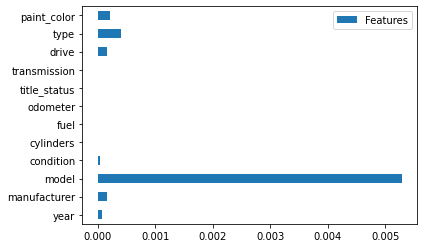

In [59]:
scaler_model = pd.DataFrame(spi.importances_mean, columns=['Features'],index=X_train.columns)
scaler_model.plot.barh()
#plt.title('Permuatation importances of Features after a StandardScaler model')

In [52]:
#Select the n_features_to_select by running GridSearchCV
selector = SequentialFeatureSelector(estimator=Lasso())
param_dict = {'selector__n_features_to_select':[2,3,4,5,6]}
selector_pipe = Pipeline([('transformer', poly_ordinal_ohe),('scaler', StandardScaler(with_mean=False)),('selector',selector), ('linreg', Ridge(alpha=1.0))])
selector_grid = GridSearchCV(selector_pipe,param_dict)
selector_grid.fit(X_train, y_train)
selector_train_mse = mean_squared_error(selector_grid.best_estimator_.predict(X_train),y_train)
selector_test_mse = mean_squared_error(selector_grid.best_estimator_.predict(X_test),y_test)

In [53]:
print(selector_train_mse)
print(selector_test_mse)
print(selector_grid.best_params_)

1.4285254993873278
0.00010428784712651785
{'selector__n_features_to_select': 2}


In [61]:
ridge_param_dict = {'ridge__alpha' : [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0]}
selector2 = SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select= 2)
ridge_pipe = Pipeline([('transformer', poly_ordinal_ohe),('scaler',StandardScaler(with_mean=False)),('selector',selector2),('ridge',Ridge())])
ridge_grid = GridSearchCV(ridge_pipe, ridge_param_dict)
ridge_grid.fit(X_train, y_train)
ridge_train_mse = mean_squared_error(ridge_grid.best_estimator_.predict(X_train), y_train)
ridge_test_mse = mean_squared_error(ridge_grid.best_estimator_.predict(X_test), y_test)

In [63]:
print(ridge_train_mse)
print(ridge_test_mse)
print(ridge_grid.best_params_)

1.4285343565101478
9.35941176829756e-05
{'ridge__alpha': 1000.0}


In [64]:
selector = SequentialFeatureSelector(estimator=Lasso(), n_features_to_select=2)
model_pipe = Pipeline([('transformer', poly_ordinal_ohe),('scaler', StandardScaler(with_mean=False)),('selector',selector), ('linreg', Ridge(alpha=1000.0))])
model_pipe.fit(X_train, y_train)
mp1 = model_pipe.predict(X_train)
mp2 = model_pipe.predict(X_test)
train_mse_model = mean_squared_error(y_train,mp1)
test_mse_model = mean_squared_error(y_test, mp2)
print(train_mse_model)
print(test_mse_model)

1.4285255018234466
0.00010396735043581574


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Results Evaluation: With the linear regression model the mean squared error for test data was better than the training error. While this model is based on data trimmed based on the top 259 car models, the model could be trained better with grouping similar car models. The model that performed wellwas the model with Ridge Regression and alpha of 1000.0 and Sequential Feature Selection number of features to select =2. This model will perform well as long as the training model is fed a car model that it has seen during training. Moreover, one could tell looking at the data cursorily that certain models have sold more than others and possibly hold that trend in the future.

Review: Merging similar data and running the model again and also making sure the test and train split produces similar distribution of data will ensure a robust model.

Next steps: Identify car models that can be merged. This will bring down the number of categories in the model. 

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Final Report: We have successfully generated a machine learning model that given the necessary inputs of a car will predict the price of the car. From the data that was presented to us, we can tell that number of pickup truck models sold were at the top of the number of models sold implying that the pickup trucks will sell fast. The model can be improved to predict better. This model will predict with high amount of confidence only if it has seen the car model before. Some of the car models did not have enough data for the model to understand the pattern. Nevertheless, this is a good starting point for price prediction of car models.